https://morvanzhou.github.io/tutorials/machine-learning/torch/4-02-B-LSTM/

LSTM技术是为了解决普通RNN的弊端而提出来的。

LSTM 是 long-short term memory 的简称, 中文叫做 长短期记忆. 是当下最流行的 RNN 形式之一.

# RNN 的弊端

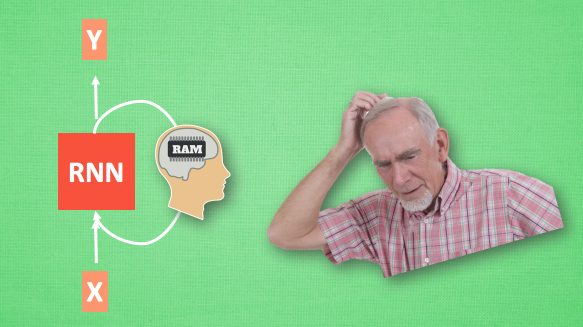

之前我们说过, RNN 是在有顺序的数据上进行学习的. 为了记住这些数据, RNN 会像人一样产生对先前发生事件的记忆. 不过一般形式的 RNN 就像一个老爷爷, 有时候比较健忘. 为什么会这样呢?

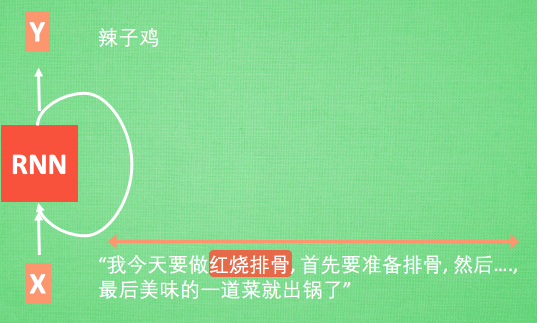

想像现在有这样一个 RNN, 他的输入值是一句话: ‘我今天要做红烧排骨, 首先要准备排骨, 然后…., 最后美味的一道菜就出锅了’, shua ~ 说着说着就流口水了. 现在请 RNN 来分析, 我今天做的到底是什么菜呢. RNN可能会给出“辣子鸡”这个答案. 由于判断失误, RNN就要开始学习 这个长序列 X 和 ‘红烧排骨’ 的关系 , 而RNN需要的关键信息 ”红烧排骨”却出现在句子开头,

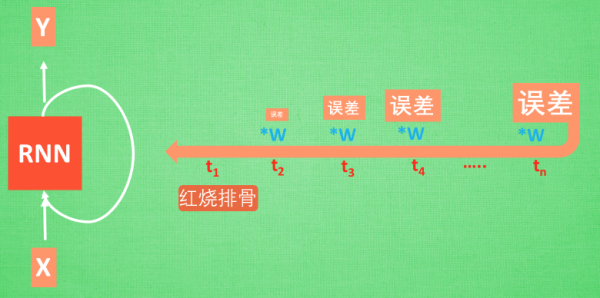

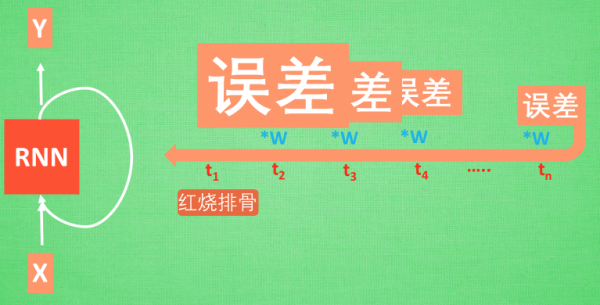

再来看看 RNN是怎样学习的吧. 红烧排骨这个信息原的记忆要进过长途跋涉才能抵达最后一个时间点. 然后我们得到误差, 而且在 反向传递 得到的误差的时候, 他在每一步都会 乘以一个自己的参数 W. 如果这个 W 是一个小于1 的数, 比如0.9. 这个0.9 不断乘以误差, 误差传到初始时间点也会是一个接近于零的数, 所以对于初始时刻, 误差相当于就消失了. 我们把这个问题叫做梯度消失或者梯度弥散 Gradient vanishing. 反之如果 W 是一个大于1 的数, 比如1.1 不断累乘, 则到最后变成了无穷大的数, RNN被这无穷大的数撑死了, 这种情况我们叫做剃度爆炸, Gradient exploding. 这就是普通 RNN 没有办法回忆起久远记忆的原因.

# LSTM

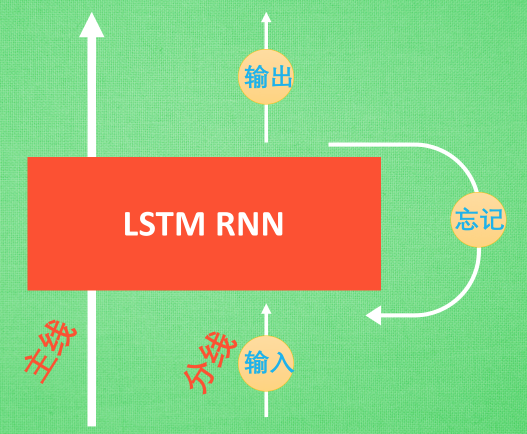

LSTM 就是为了解决这个问题而诞生的. LSTM 和普通 RNN 相比, 多出了三个控制器. (输入控制, 输出控制, 忘记控制). 现在, LSTM RNN 内部的情况是这样.

他多了一个 控制全局的记忆, 我们用粗线代替. 为了方便理解, 我们把粗线想象成电影或游戏当中的 主线剧情. 而原本的 RNN 体系就是 分线剧情. 三个控制器都是在原始的 RNN 体系上, 我们先看 输入方面 , 如果此时的分线剧情对于剧终结果十分重要, 输入控制就会将这个分线剧情按重要程度 写入主线剧情 进行分析. 再看 忘记方面, 如果此时的分线剧情更改了我们对之前剧情的想法, 那么忘记控制就会将之前的某些主线剧情忘记, 按比例替换成现在的新剧情. 所以 主线剧情的更新就取决于输入 和忘记 控制. 最后的输出方面, 输出控制会基于目前的主线剧情和分线剧情判断要输出的到底是什么.基于这些控制机制, LSTM 就像延缓记忆衰退的良药, 可以带来更好的结果.